In [2]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras import backend as K

2023-01-29 17:17:58.500837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))

In [6]:
y_train.shape

(60000,)

In [9]:
num_count = np.zeros(10)

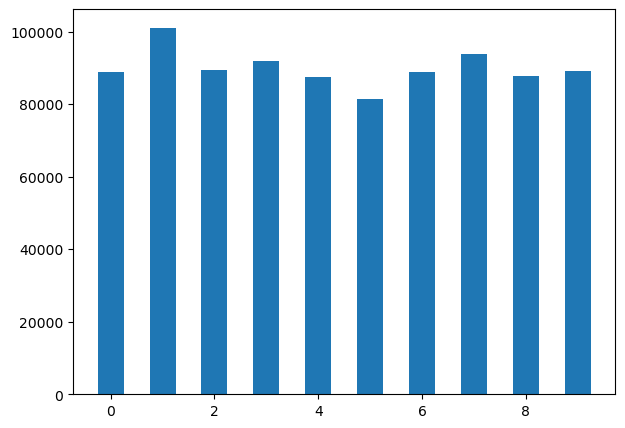

In [44]:
for i in y_train:
    num_count[i] += 1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
y_label = list(set(y_train))
plt.bar(y_label,num_count,width=0.5)
plt.show()


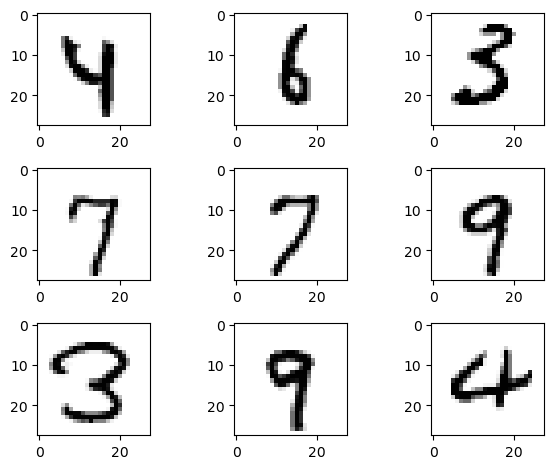

In [62]:
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        rand_num = np.random.randint(0,60000)
        ax[i,j].imshow(X_train[rand_num],cmap='Greys')
        plt.tight_layout()

In [53]:
X_train.shape

(60000, 28, 28, 1)